In [1]:
path = "/home/mila/d/dereck.piche/scratch/llm_negotiation/2025-06-19___22-00-12_negotiation_game_sum_of_credits/seed_1"

In [2]:
from mllm.environments.dond import dond_statistics
game_data_alice = dond_statistics.get_all_iterations_data(path, "Alice")
game_data_bob = dond_statistics.get_all_iterations_data(path, "Bob")

In [3]:
from mllm.training import produce_training_stats
training_data = produce_training_stats.get_iterations_data(path)

# Analysis

In [8]:
training_data[0].keys()

AttributeError: 'list' object has no attribute 'keys'

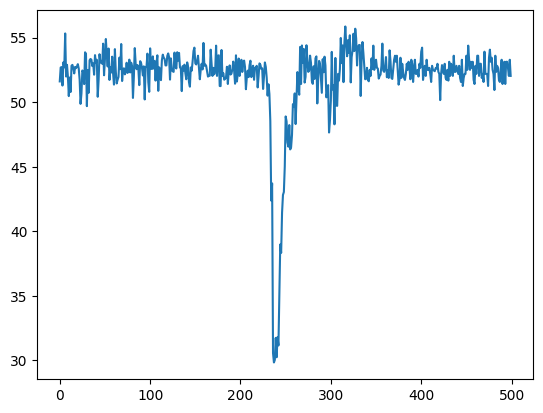

In [4]:
import matplotlib.pyplot as plt
coins_allocation_efficiency = [dond_statistics.get_coins_allocation_efficiency(d)[1] for d in game_data_alice]
plt.plot(coins_allocation_efficiency)

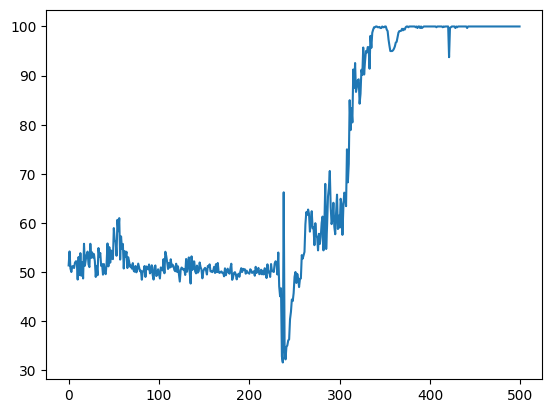

In [5]:
calc_items_given_to_self = [dond_statistics.calc_items_given_to_self(d)[1] for d in game_data_alice]
plt.plot(calc_items_given_to_self)

In [6]:
len(training_data)
training_data[0].keys()

dict_keys(['discounted_returns', 'critic loss', 'nb_rollouts', 'nb_tokens', 'loss_mb_total', 'gradient_norm'])

In [7]:
# cl = get_single_metric_vector(data, ["critic loss"], range(len(data)))
from statistics import mean
cl = get_metric_iteration_list(data, "critic loss")
cl = [mean(c) for c in cl]
len(cl)
plt.plot(cl)
plt.title("Critic Loss Through Iterations")

NameError: name 'get_metric_iteration_list' is not defined

In [ ]:
pgl = get_metric_iteration_list(data, ["loss_mb_total"])
print(pgl[0])
pgl  = [mean(l["value_mb_total"]) for l in pgl]
len(pgl)
plt.plot(pgl)
plt.title("Policy Gradient Loss Through Iterations")

In [ ]:
plt.plot(cl)

# Get Stats

In [ ]:
reg_scores = get_single_metric_vector(data, ['a1_after_normalizing'], range(len(data)))
op_terms = get_single_metric_vector(data, ['ad_align_opp_shaping_terms'], range(len(data)))
aa_scores = get_single_metric_vector(data, ['final_advantage_alignment_scores'], range(len(data)))
n_bins = 25


fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(reg_scores, bins=n_bins)
axs[0].set_xlabel('REG')
axs[1].hist(op_terms, bins=n_bins)
axs[1].set_xlabel('OP')
axs[2].hist(aa_scores, bins=n_bins)
axs[2].set_xlabel('AA')
plt.show()

In [ ]:
print("Reg. Mean: ", np.mean(reg_scores))
print("Reg. STD: ", np.std(reg_scores))
print("OP Mean: ", np.mean(op_terms))
print("OP STD: ", np.std(op_terms))
print("AA Mean: ", np.mean(aa_scores))
print("AA STD: ", np.std(aa_scores))
print("AA min: ", np.min(aa_scores))
print("AA max: ", np.max(aa_scores))

In [ ]:
N = reg_scores.size
print("Corr. Coeff Reg & AA", np.corrcoef(reg_scores[:N], aa_scores[:N])[0,1])
print("Corr. Coeff OP & AA", np.corrcoef(op_terms[:N], aa_scores[:N])[0,1])